# S6E2 & S7E2 Load Line

## Given a nonlinear device defined as

## $ I_A = \frac{1A}{V^3} * v^3 $

## Placed in the circuit

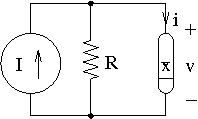

### $ I = 4  A $ $ R = 8.2 $

## Load Line defined as

## $ \frac{E - 32.8}{8.2} + I_D = 0 $ OR $ I_D = 4 - \frac{E}{8.2}$

# 1) Load Line Crosses Y AXIS 

## Solve $ I_D = 4 - \frac{E}{8.2} $ , $ E = 0 $

## $ I_D = 4 $

# 2) Voltage (in Volts) where the load line intercepts the horizontal axis?

## Solve for $ I_D = 4 - \frac{E}{8.3} $ , $ I_D = 0 $

## $ E = 32.8 $

# 3) Operating Point (Using graphical method, but could use newton)

operating:  1.315697661387879 2.2785734559283077


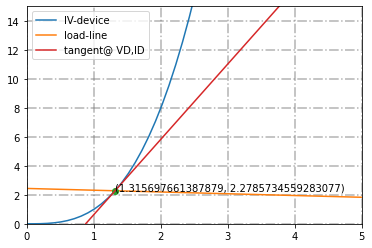

In [35]:

import numpy as np
import matplotlib.pyplot as plt

from shapely.geometry import LineString


def device_ia(v):
    return v**3

def device_didv(v):
    return 3 * v**2

def tangent_line(v, VD, ID, slope):
    return (v-VD) * slope + ID


# E = 32.8
E = 20
R = 8.2
def load_line(v):
    return E/R - v/R

fig, ax = plt.subplots()

x = np.linspace(0, 10, 100)
ia_plt, = plt.plot(x, device_ia(x), label='IV-device')
loadline_plt, = plt.plot(x, load_line(x), label='load-line')

first_line = LineString(np.column_stack((x, [device_ia(p) for p in x])))
second_line = LineString(np.column_stack((x, [load_line(p) for p in x])))
intersection = first_line.intersection(second_line)

if intersection.geom_type != 'Point':
    print("Intersection is NOT a Point")
    
plt.plot(*intersection.xy, 'o')
VD, ID = intersection.xy
print("operating: ", VD[0], ID[0])
ax.annotate('(%s, %s)' % (VD[0], ID[0]), xy=[VD[0], ID[0]], textcoords='data')

tangent_plt, = plt.plot(x, tangent_line(x, VD[0], ID[0], device_didv(VD[0])), label='tangent@ VD,ID')

plt.legend(handles=[ia_plt, loadline_plt, tangent_plt], loc='upper left')

ax.set_ylim(0, 15)
ax.set_xlim(0, 5)
plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dashdot', lw=1.5)

# plt.minorticks_on()
# plt.grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=1)




## Incremental Resistance at Operating Point

## $ = \frac{1}{\frac{d_i}{d_v}} $

## $ = \frac{1}{3 * v^2} = ????? $